<a href="https://colab.research.google.com/github/srikharshashi/learn-dl/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn
import pandas as pd

In [2]:
from keras import datasets,layers,models

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [4]:
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

In [6]:
y_train=np.squeeze(y_train)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [8]:
def show(X,Y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[Y[index]])

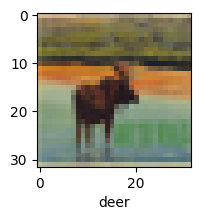

In [9]:
show(X_train,y_train,66)

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=50)

Epoch 1/50
1408/1563 [==========================>...] - ETA: 0s - loss: 1.8269 - accuracy: 0.3517

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


As we saw above it took 50 epochs and reached 91% accuracy but it can be improved using CNN and will take less computation

In [12]:
cnn=models.Sequential([
    # Input
    layers.InputLayer(input_shape=(32,32,3)),

    # cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    # dense layers
    layers.Flatten(),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax') 
])

In [13]:
cnn.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0530 - accuracy: 0.9843
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0574 - accuracy: 0.9829
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0544 - accuracy: 0.9841
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0575 - accuracy: 0.9843
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0559 - accuracy: 0.9843
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0578 - accuracy: 0.9841
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0504 - accuracy: 0.9854
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0516 - accuracy: 0.9855
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0463 - accuracy: 0.9874
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.056

In [15]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3300 - accuracy: 0.6839


[2.3299560546875, 0.683899998664856]

In [ ]:
y_predict=cnn.predict(X_test)